# Analyse sensors

### Read data from `.log` file

Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import utils

Set logs filename

In [2]:
# log_filename = os.path.join(
#     utils.PROJECT_DIR,
#     'logs',
#     '000_2022-11-09_18-39-09.log'
# )

log_filename = os.path.join(
    utils.PROJECT_DIR,
    utils.LOGS_RELATIVE_DIR,
    'free',
    '000_2022-11-09_18-39-09.log'
)

Read Measurements

In [3]:
df_meas = utils.read_log(log_filename, utils.AllowedReads.MEASUREMENTS)
df_meas.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,timestamp
0,65535,186,112,62,103,65535,85,123,92,8191,...,8191,65535,8191,8191,8191,8191,8191,8191,65535,2022-11-09 18:39:15.009
1,65535,8190,424,86,103,65535,85,123,92,197,...,53,65535,159,8191,8191,8191,8191,8191,65535,2022-11-09 18:39:15.044
2,65535,91,424,86,65535,65535,85,123,92,197,...,53,65535,159,0,33,158,184,70,65535,2022-11-09 18:39:15.155
3,65535,87,424,86,65535,342,52,394,84,197,...,53,65535,159,0,33,158,184,70,65535,2022-11-09 18:39:15.157
4,65535,102,473,86,65535,342,52,394,65535,65535,...,53,65535,159,0,33,158,184,70,65535,2022-11-09 18:39:15.275


Read raduis scans

In [4]:
df_scan = utils.read_log(log_filename, utils.AllowedReads.RADIUS_SCAN)
df_scan.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,timestamp
0,-65292,57,131,181,140,-65292,158,120,151,-7948,...,-7948,-65292,-7948,-7948,-7948,-7948,-7948,-7948,-65292,2022-11-09 18:39:15.009
1,-65292,-7947,-181,157,140,-65292,158,120,151,46,...,190,-65292,84,-7948,-7948,-7948,-7948,-7948,-65292,2022-11-09 18:39:15.044
2,-65292,152,-181,157,-65292,-65292,158,120,151,46,...,190,-65292,84,243,210,85,59,173,-65292,2022-11-09 18:39:15.156
3,-65292,156,-181,157,-65292,-99,191,-151,159,46,...,190,-65292,84,243,210,85,59,173,-65292,2022-11-09 18:39:15.157
4,-65292,141,-230,157,-65292,-99,191,-151,-65292,-65292,...,190,-65292,84,243,210,85,59,173,-65292,2022-11-09 18:39:15.280


Read volumes

In [5]:
utils.get_volumes_from_log(log_filename)

[]

### Pre-process data

Helper array of sensors ids

In [6]:
ids = [str(sensor_id) for sensor_id in range(24)]

Replace invalid measurements

In [7]:
to_replace = [65535, 8191, 8190]
df_meas.replace(to_replace, [np.nan] * len(to_replace), inplace=True)

Make timestamp indexing

In [8]:
df_meas_time = df_meas.set_index('timestamp')
df_meas_time.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-09 18:39:15.009,NaN,186.0,112.0,62.0,103.0,NaN,85.0,123.0,92.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-09 18:39:15.044,NaN,NaN,424.0,86.0,103.0,NaN,85.0,123.0,92.0,197.0,...,64.0,53.0,NaN,159.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-09 18:39:15.155,NaN,91.0,424.0,86.0,NaN,NaN,85.0,123.0,92.0,197.0,...,64.0,53.0,NaN,159.0,0.0,33.0,158.0,184.0,70.0,NaN
2022-11-09 18:39:15.157,NaN,87.0,424.0,86.0,NaN,342.0,52.0,394.0,84.0,197.0,...,64.0,53.0,NaN,159.0,0.0,33.0,158.0,184.0,70.0,NaN
2022-11-09 18:39:15.275,NaN,102.0,473.0,86.0,NaN,342.0,52.0,394.0,NaN,NaN,...,64.0,53.0,NaN,159.0,0.0,33.0,158.0,184.0,70.0,NaN


### Analyse data

Sensors measurements

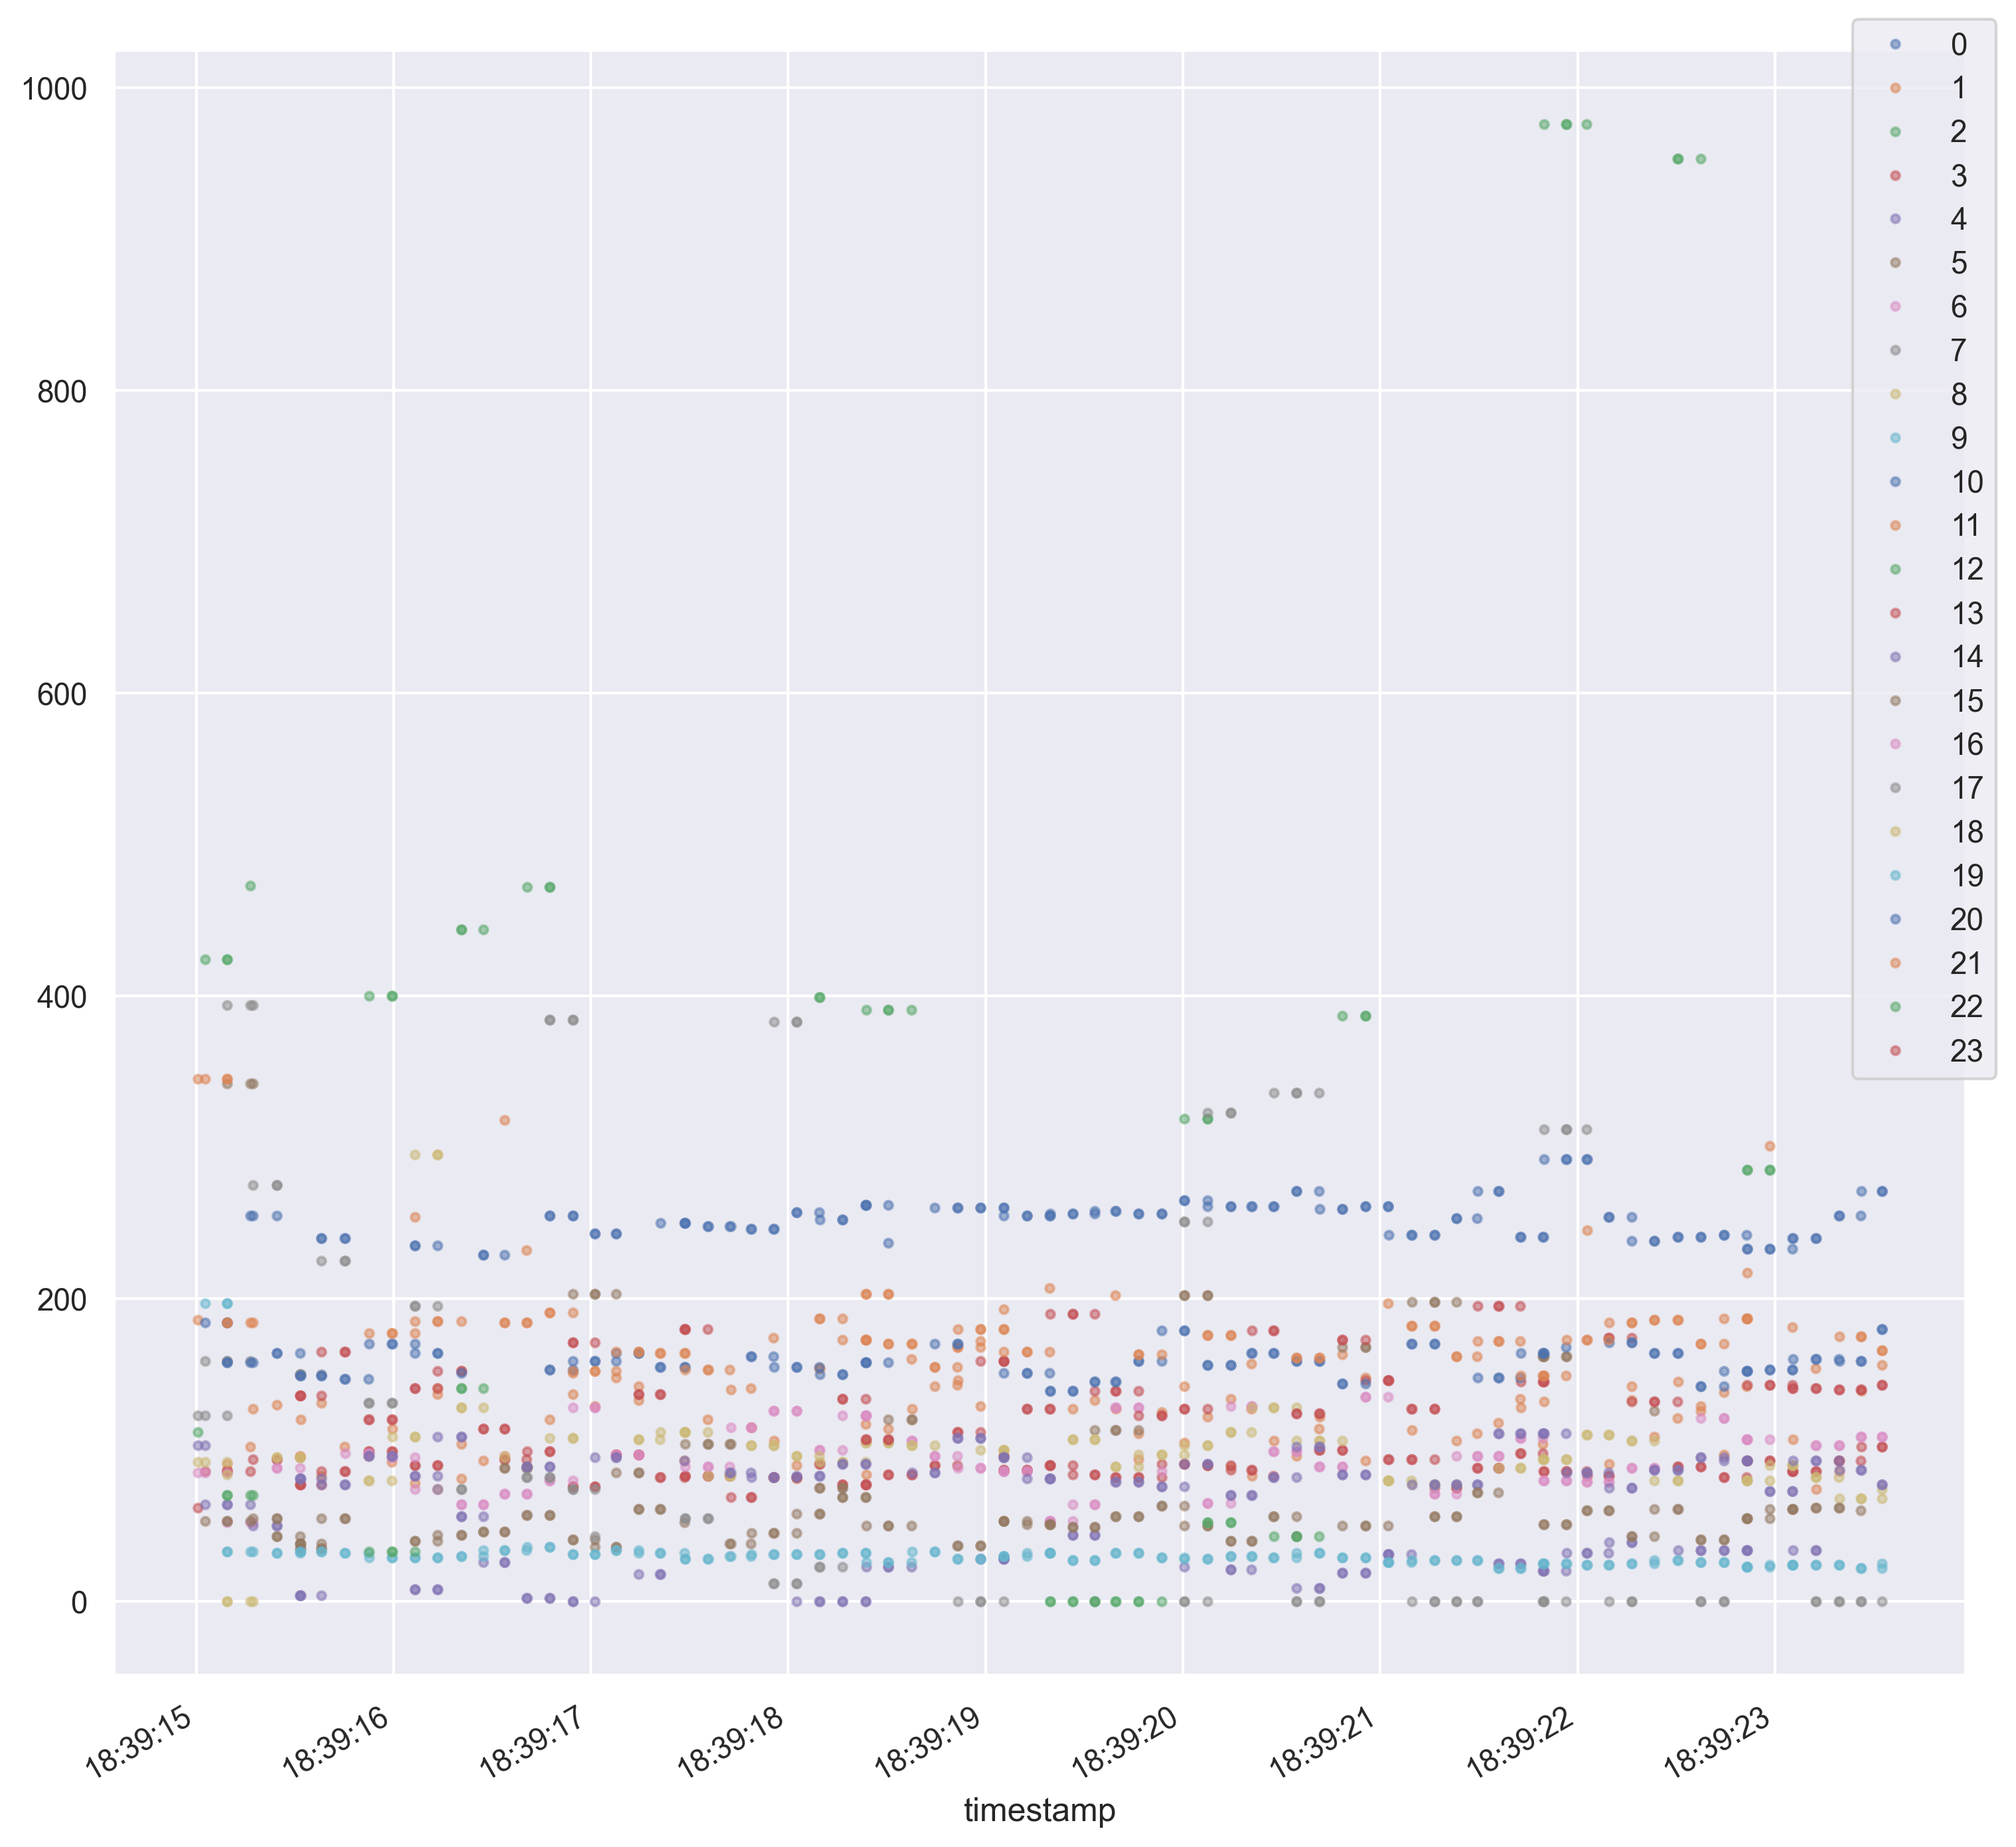

In [44]:
df_meas_time[ids].plot(marker='.', alpha=0.5, linestyle='None', legend=False)
plt.legend(loc='upper right');

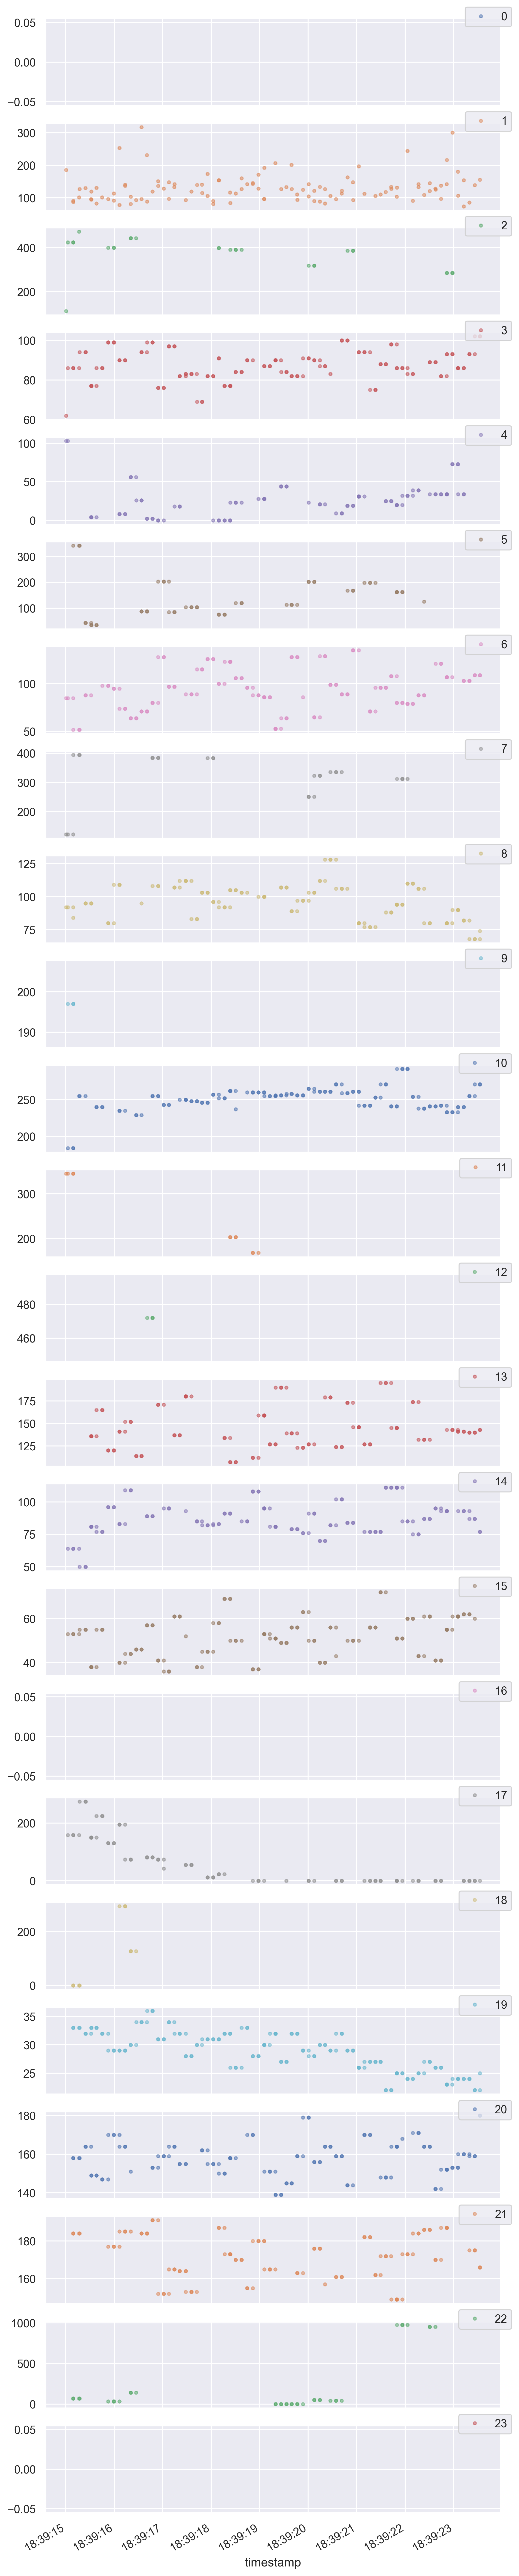

In [39]:
axes = df_meas_time[ids].plot(marker='.', alpha=0.5, linestyle='None', subplots=True, figsize=(8, 50));
for ax in axes:
    ax.legend(loc='upper right');

Box plot for each sensor

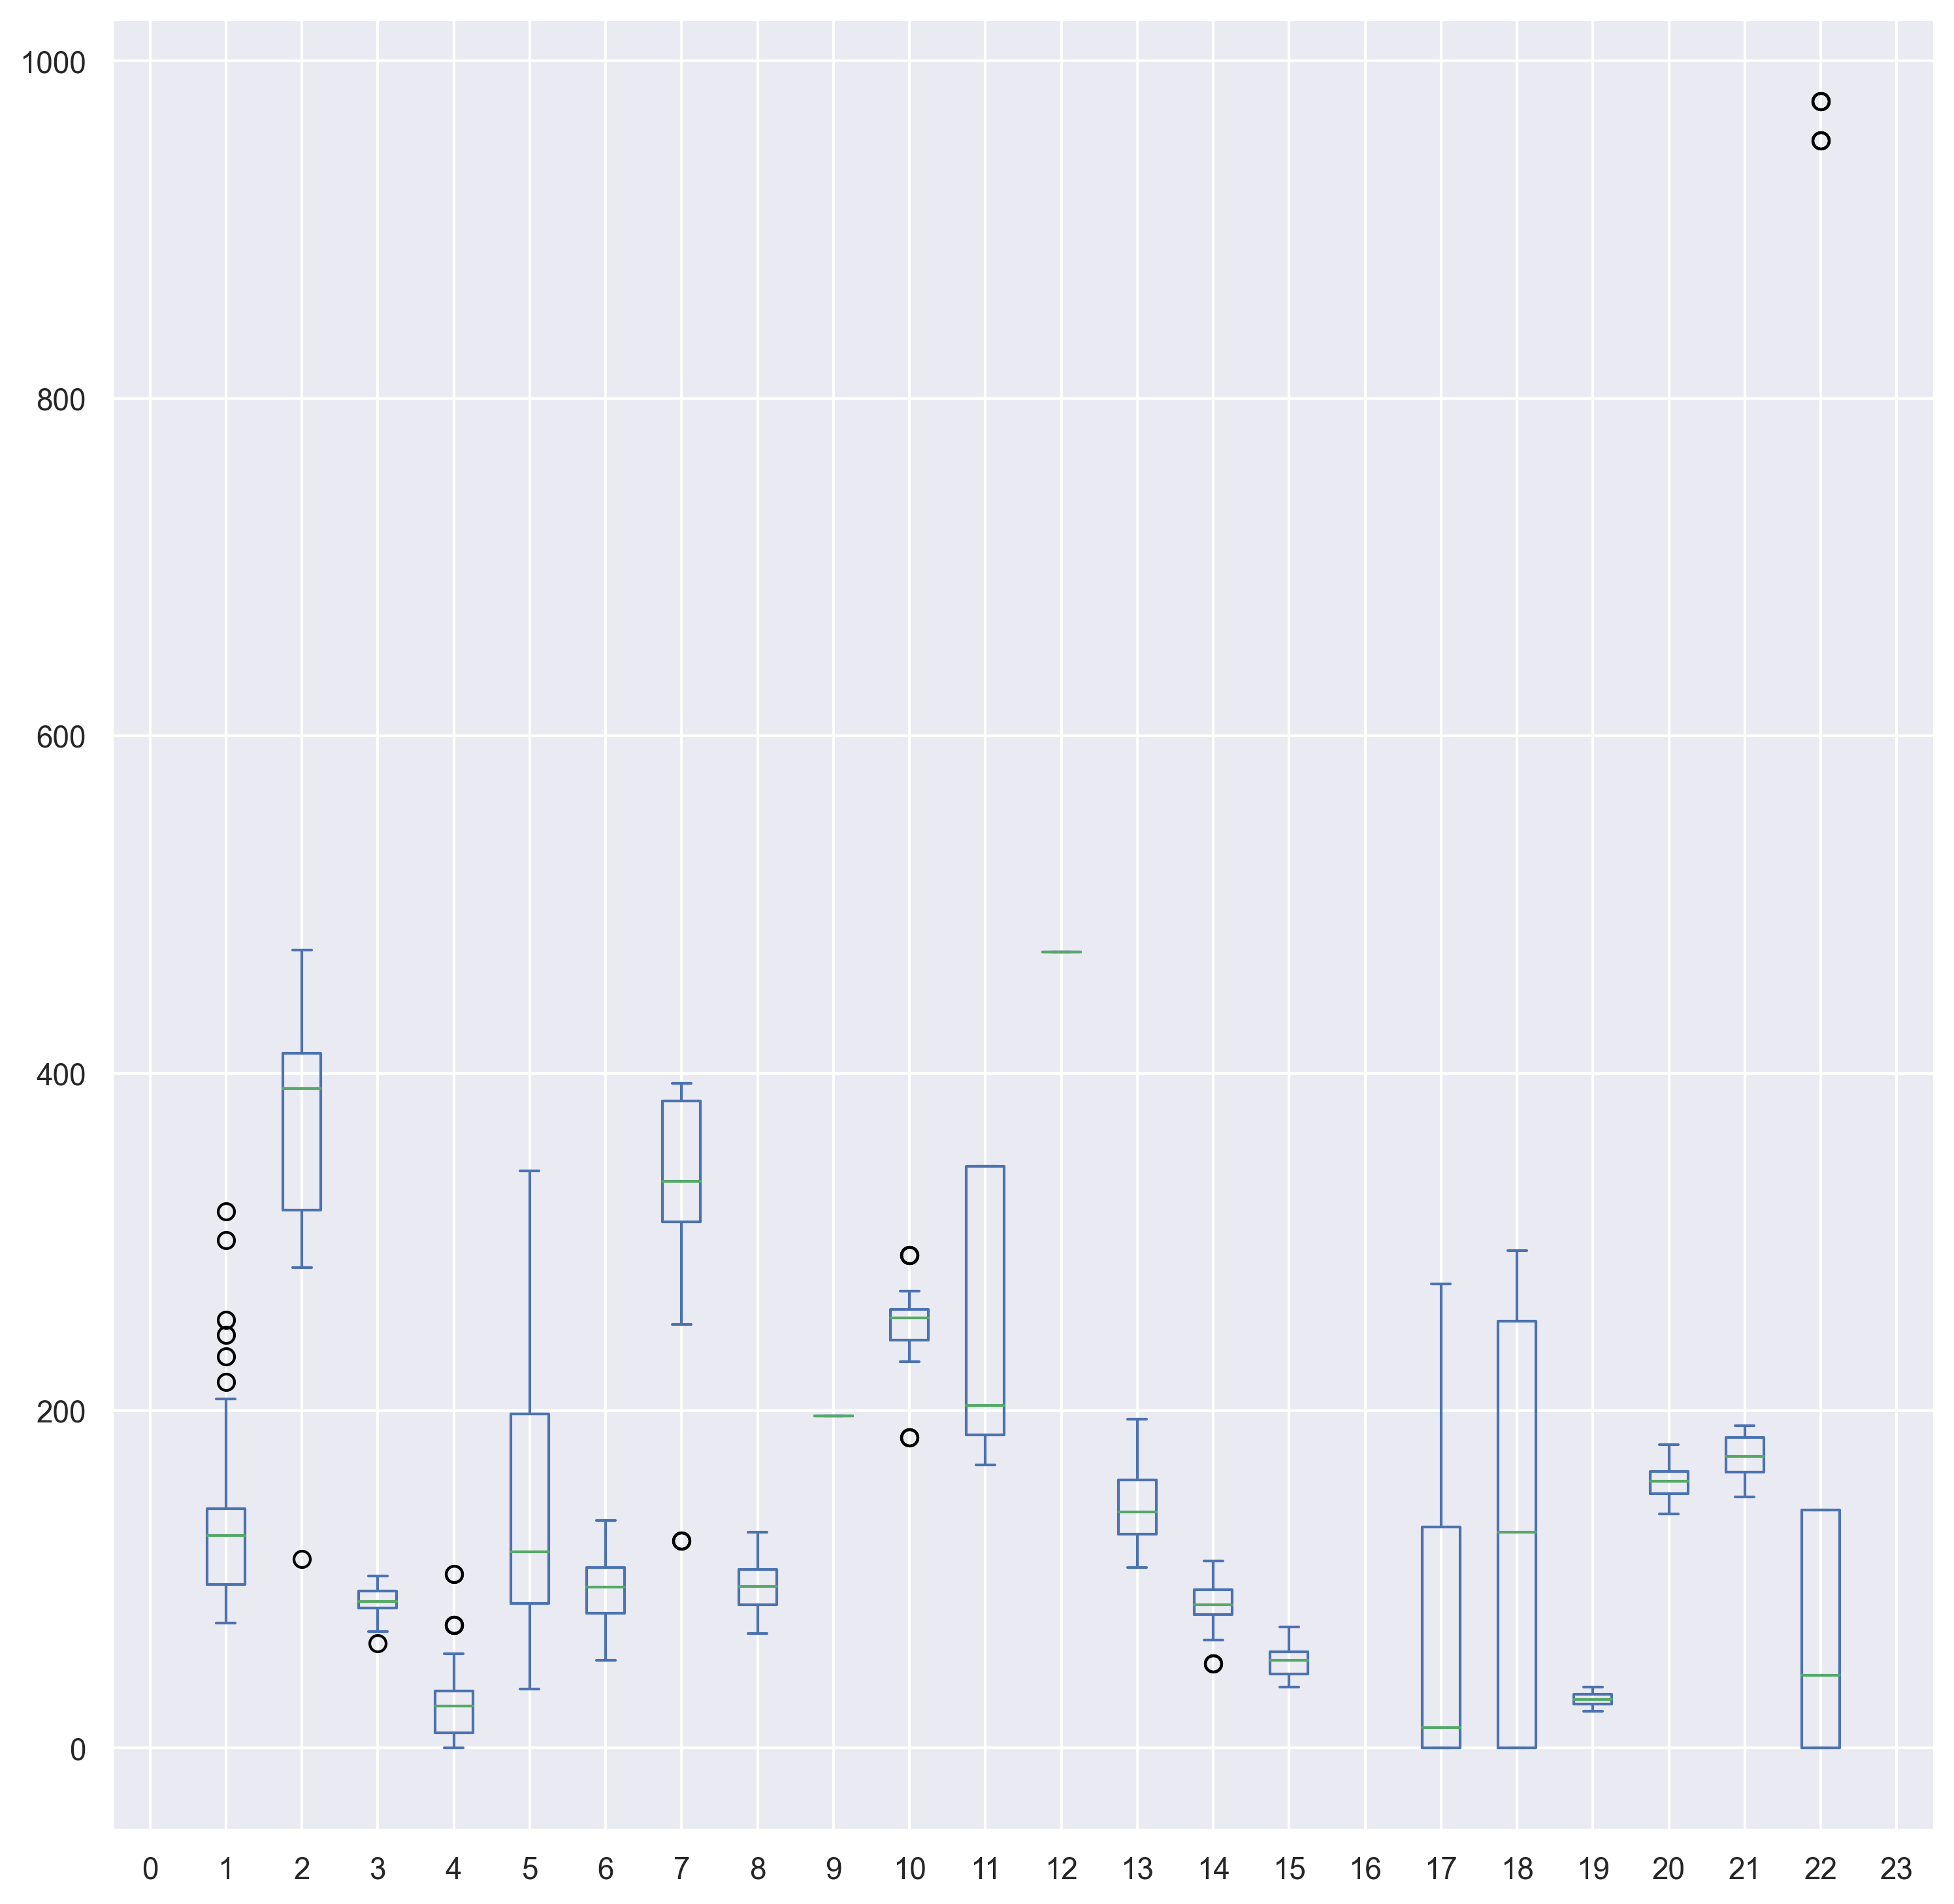

In [43]:
df_meas_time[ids].plot(kind='box');